In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [ ]:
data=pd.read_csv('/DataCoSupplyChainDataset.csv', encoding='latin-1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [ ]:
data.shape

(180519, 53)

# EDA

In [ ]:
data.drop(['Product Description','Order Zipcode'],axis=1,inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [ ]:
dfunique= data.nunique().sort_values(ascending= True, na_position='first')
dfunique.head()

Product Status        1
Customer Password     1
Customer Email        1
Customer Country      2
Late_delivery_risk    2
dtype: int64

In [ ]:
data.drop(dfunique.index[np.where(dfunique < 2)], axis=1, inplace=True)

In [ ]:
data.drop(["Product Image", "Order Item Cardprod Id", "Order Item Id","Customer Country","Customer Fname","Customer Id","Customer Lname","Customer Segment","Customer State",
"Customer Street","Product Card Id", "Category Id", "Customer Country", "Customer State", "Customer Street", "Department Id", "Customer Fname","Order Item Discount", "Product Category Id"], axis = 1, inplace= True)


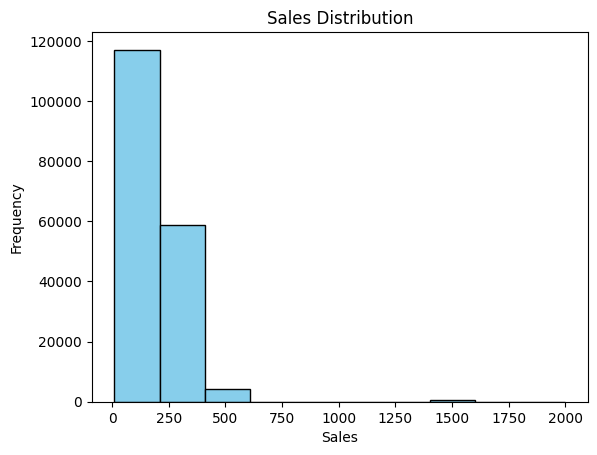

In [ ]:
plt.hist(data['Sales'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')

# Show plot
plt.show()

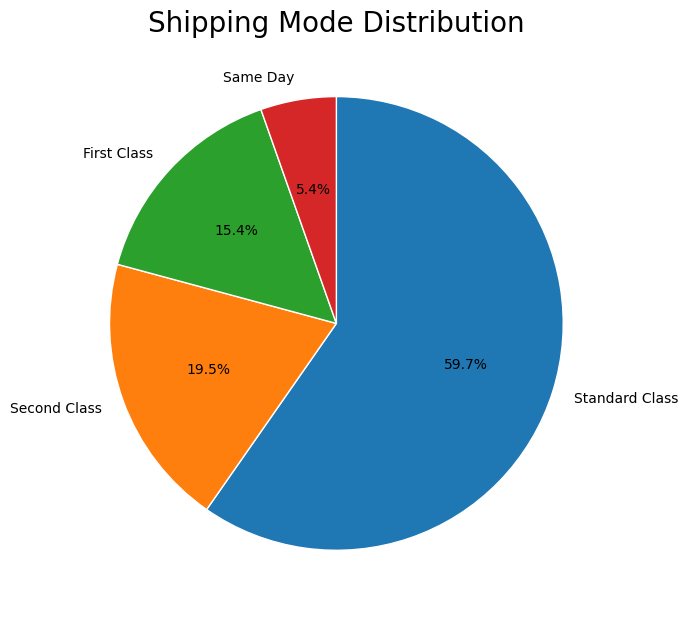

In [ ]:
plt.subplots(figsize=(7,7))
plt.pie(data['Shipping Mode'].value_counts(),
    labels= dict(data['Shipping Mode'].value_counts()).keys(),
    autopct= '%1.1f%%',
    startangle= 90,
    counterclock=False,
    wedgeprops = {'edgecolor' : 'white'})
plt.title('Shipping Mode Distribution', size= 20)
plt.tight_layout()
#plt.savefig('shipping mode.png',dpi=200)
plt.show();

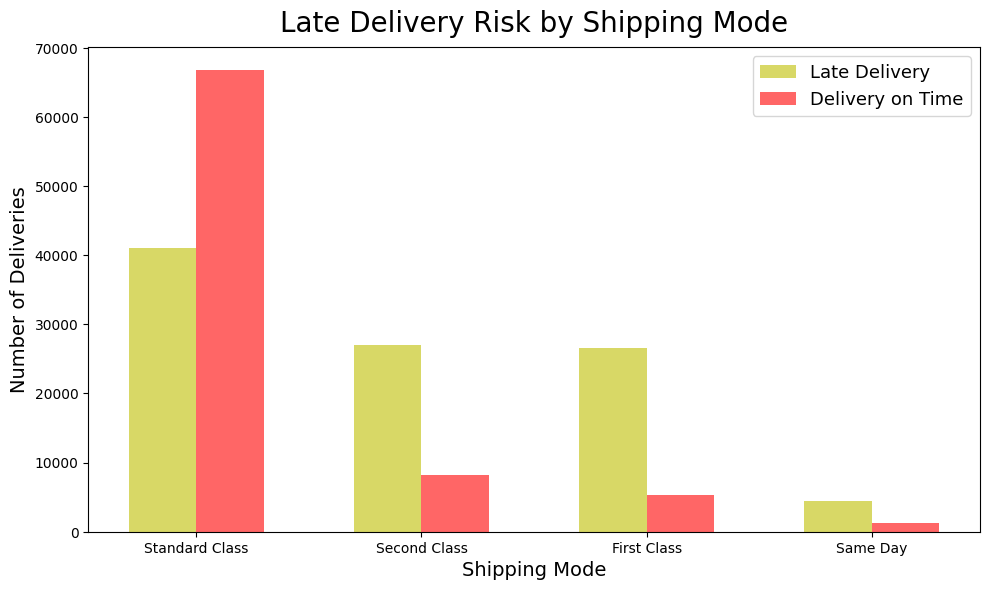

In [ ]:
late = data[(data['Late_delivery_risk'] == 1)]
ontime = data[(data['Late_delivery_risk'] == 0)]
count1=late['Shipping Mode'].value_counts()
count2=ontime['Shipping Mode'].value_counts()
names=data['Shipping Mode'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,6))
index=np.arange(4)
bar_width=0.3
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='y',label='Late Delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Delivery on Time')
plt.xlabel('Shipping Mode', fontsize= 14)
plt.ylabel('Number of Deliveries', fontsize= 14)
plt.title('Late Delivery Risk by Shipping Mode', fontsize= 20, y=1.015)
plt.legend(fontsize= 13)
plt.xticks(index+bar_width/2,names)
plt.tight_layout()
#plt.savefig('late delivery risk - shipping mode.png',dpi=200)
plt.show();

In [ ]:
profits= data.groupby('Product Name')['Order Profit Per Order'].mean().sort_values(ascending=False).head(10).sort_values()


In [ ]:
profits

Product Name
Field & Stream Sportsman 16 Gun Fire Safe         43.649106
Elevation Training Mask 2.0                       44.588784
The North Face Women's Recon Backpack             49.189473
Web Camera                                        51.165203
Porcelain crafts                                  51.990042
Polar FT4 Heart Rate Monitor                      57.947500
Diamondback Boys' Insight 24 Performance Hybr     59.683103
Lawn mower                                        69.097128
Bowflex SelectTech 1090 Dumbbells                119.078000
Dell Laptop                                      157.594593
Name: Order Profit Per Order, dtype: float64

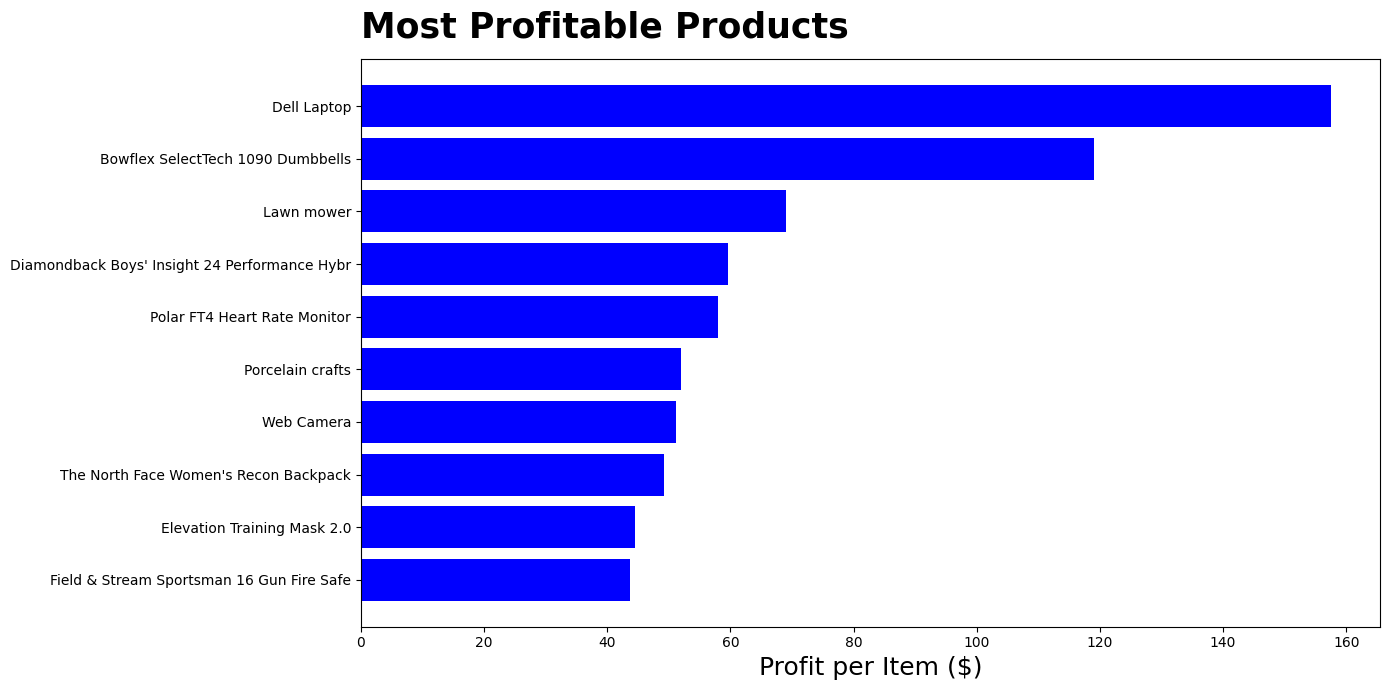

In [ ]:
plt.subplots(figsize=(14,7))
plt.barh(list(dict(profits).keys()), profits, color= 'b')
plt.title('Most Profitable Products', fontweight ='bold', size= 25, loc='left', pad=16)
plt.xlabel('Profit per Item ($)', fontsize = 18)
plt.rc('axes', labelsize=10)
plt.tight_layout()

#plt.savefig('most profitable products.png',dpi=200)
plt.show();

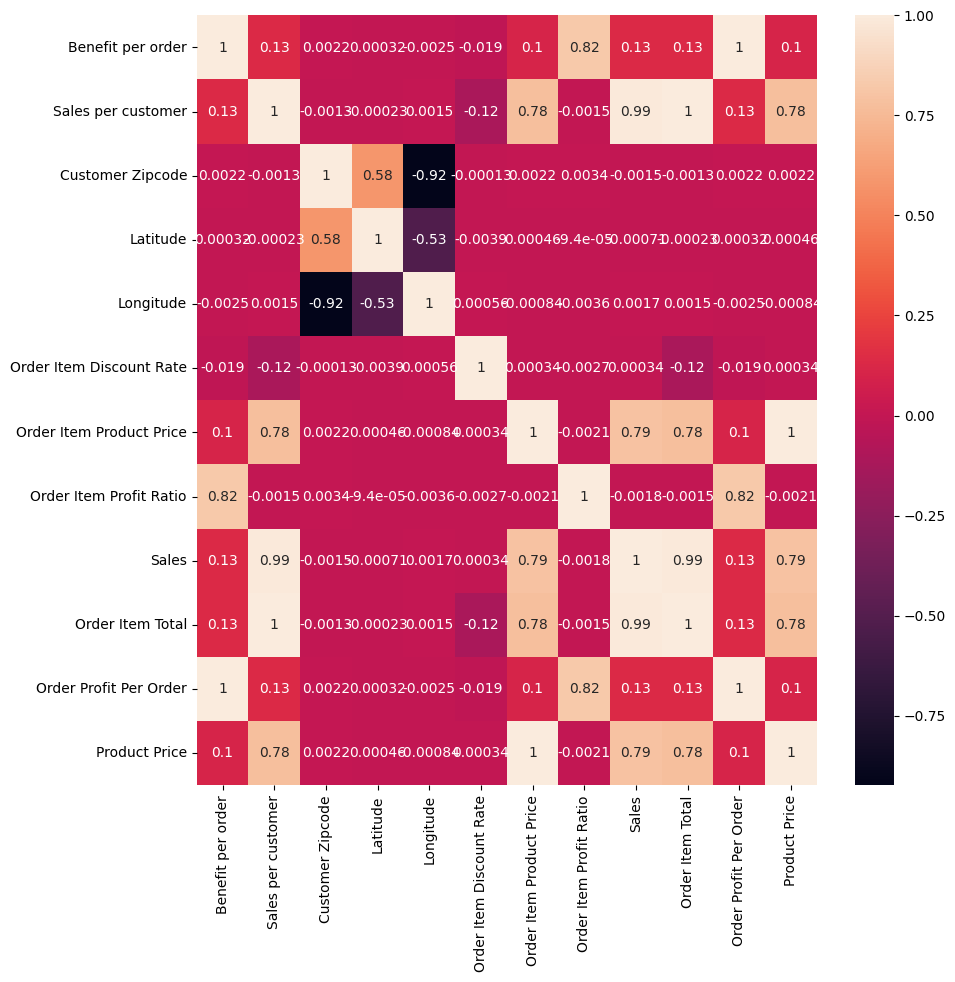

In [ ]:
plt.figure(figsize=(10,10))
dtypes_df=data.dtypes
float_col=dtypes_df.iloc[(dtypes_df=='float64').values].index
sns.heatmap(data[float_col].corr() ,annot=True)
plt.show()

In [ ]:
data["shipping date (DateOrders)"] = pd.to_datetime(data["shipping date (DateOrders)"], infer_datetime_format=True)
data["order date (DateOrders)"] = pd.to_datetime(data["order date (DateOrders)"], infer_datetime_format=True)

In [ ]:
salesdate= data.groupby(pd.Grouper(key= 'order date (DateOrders)', freq= 'M')).agg({'Order Item Total': 'sum'})
profitdate= data.groupby(pd.Grouper(key= 'order date (DateOrders)', freq= 'M')).agg({'Order Profit Per Order': 'sum'})

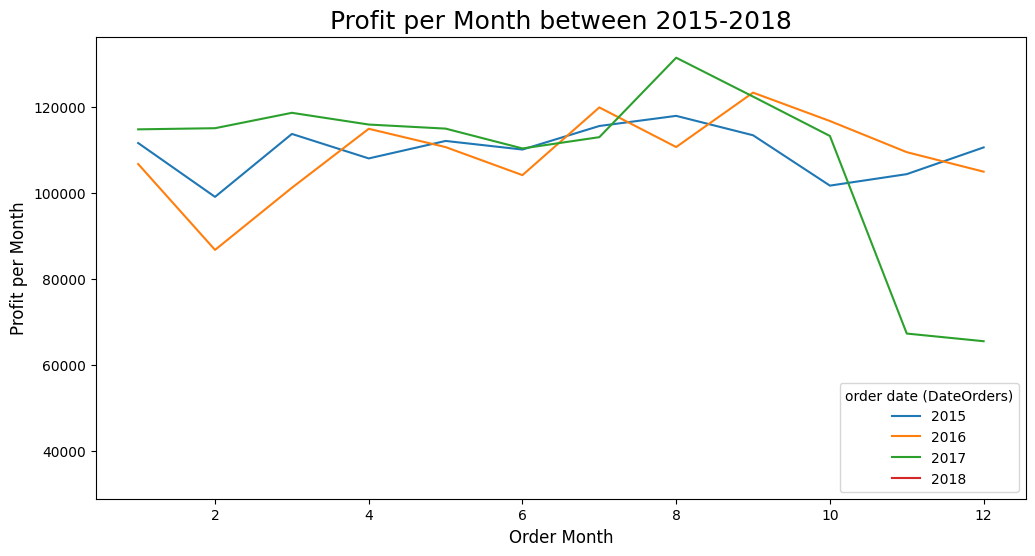

In [ ]:
plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
sns.lineplot(x=profitdate.index.month, y='Order Profit Per Order', data=profitdate, hue= profitdate.index.year, palette= 'tab10')
plt.title('Profit per Month between 2015-2018', fontsize = 18)
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Profit per Month', fontsize = 12)
#plt.savefig('profit per month.png',dpi=200)
plt.show();

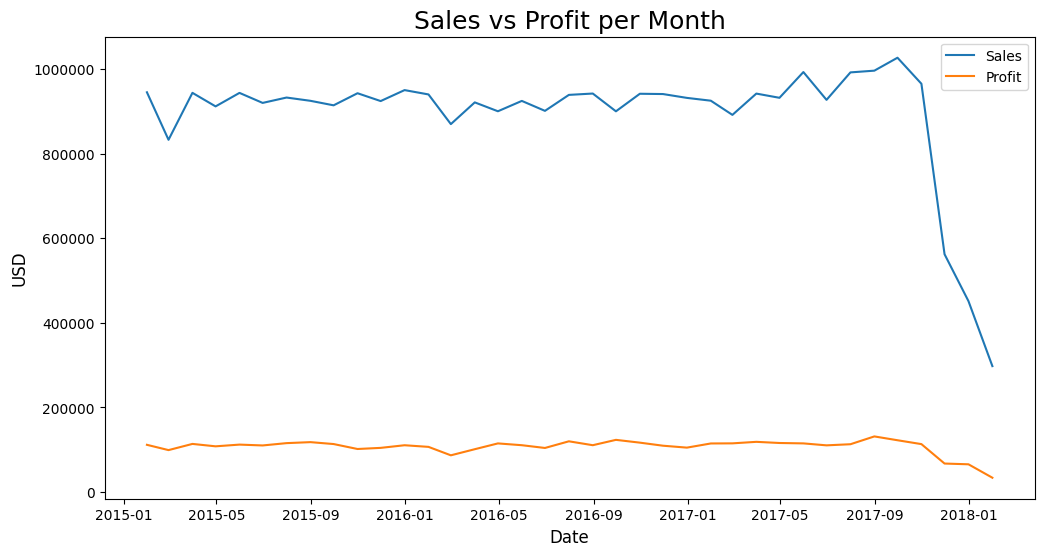

In [ ]:
plt.subplots(figsize=(12,6))
plt.ticklabel_format(style='plain')
plt.plot(salesdate.index, salesdate["Order Item Total"], label= 'Sales')
plt.plot(profitdate.index, profitdate["Order Profit Per Order"], label= 'Profit')
plt.title('Sales vs Profit per Month', fontsize = 18)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('USD', fontsize = 12)
plt.legend()
#plt.savefig('sales vs profit.png',dpi=200)
plt.show();

In [ ]:
data["order_year"]= data["order date (DateOrders)"].dt.year
data["order_month"]= data["order date (DateOrders)"].dt.month
data["order_day"]= data["order date (DateOrders)"].dt.day
data["order_hour"]= data["order date (DateOrders)"].dt.hour
# data.drop(["order date (DateOrders)"], axis = 1, inplace= True)

In [ ]:
data['order_date'] = data['order date (DateOrders)'].dt.date
data['order_time'] = data['order date (DateOrders)'].dt.time

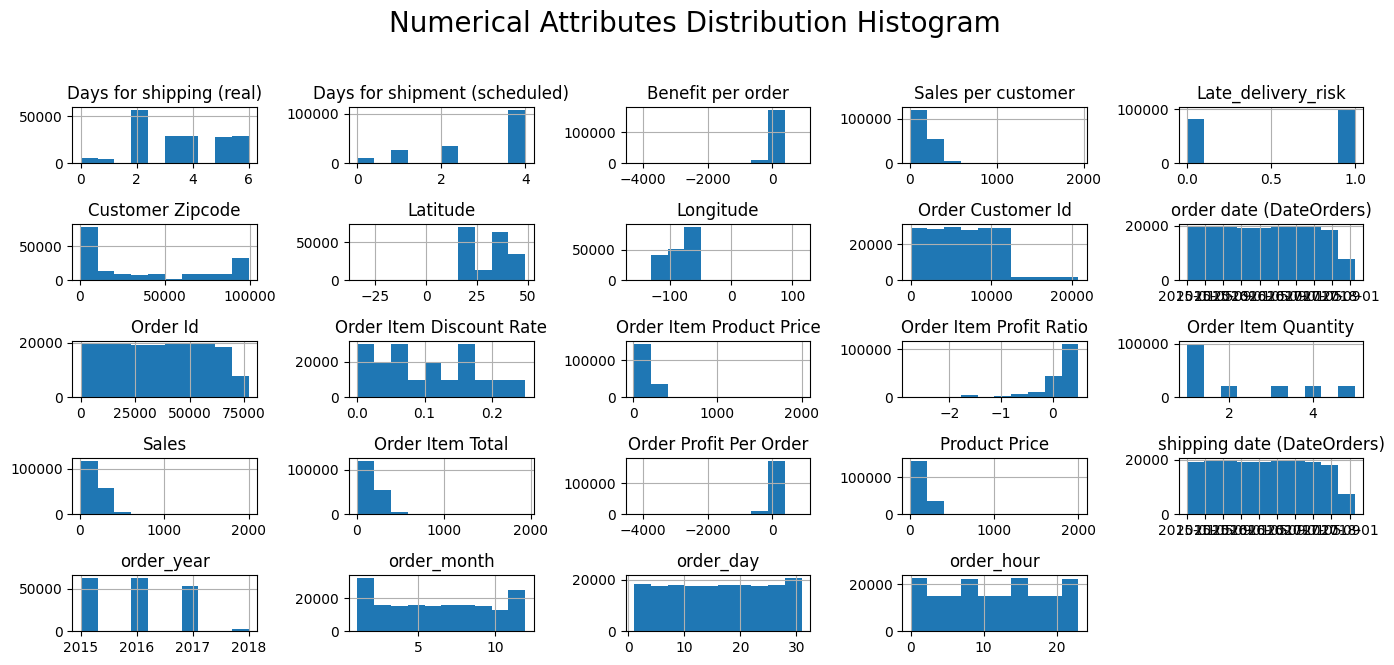

In [ ]:
data.hist(figsize=(14,6))
plt.tight_layout()
plt.suptitle('Numerical Attributes Distribution Histogram', size= 20, y= 1.1)
#plt.savefig('Numerical Attributes Distribution Histogram.png',dpi=200)
plt.show();

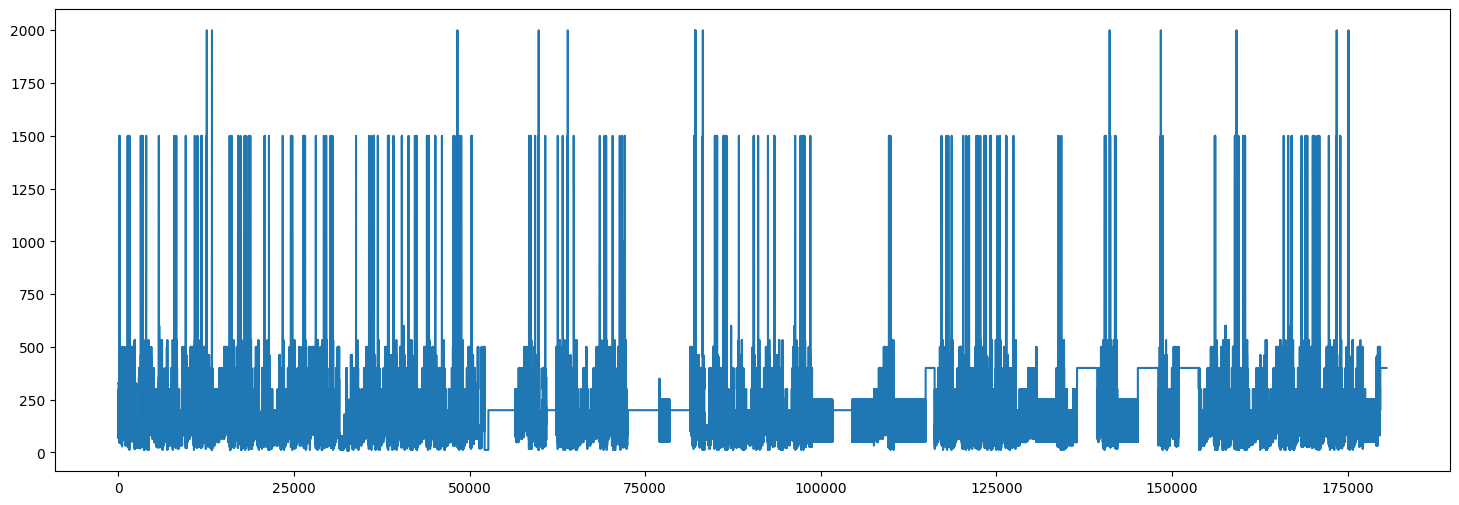

In [ ]:
plt.figure(figsize=(18,6))
data['Sales'].plot()
plt.show()

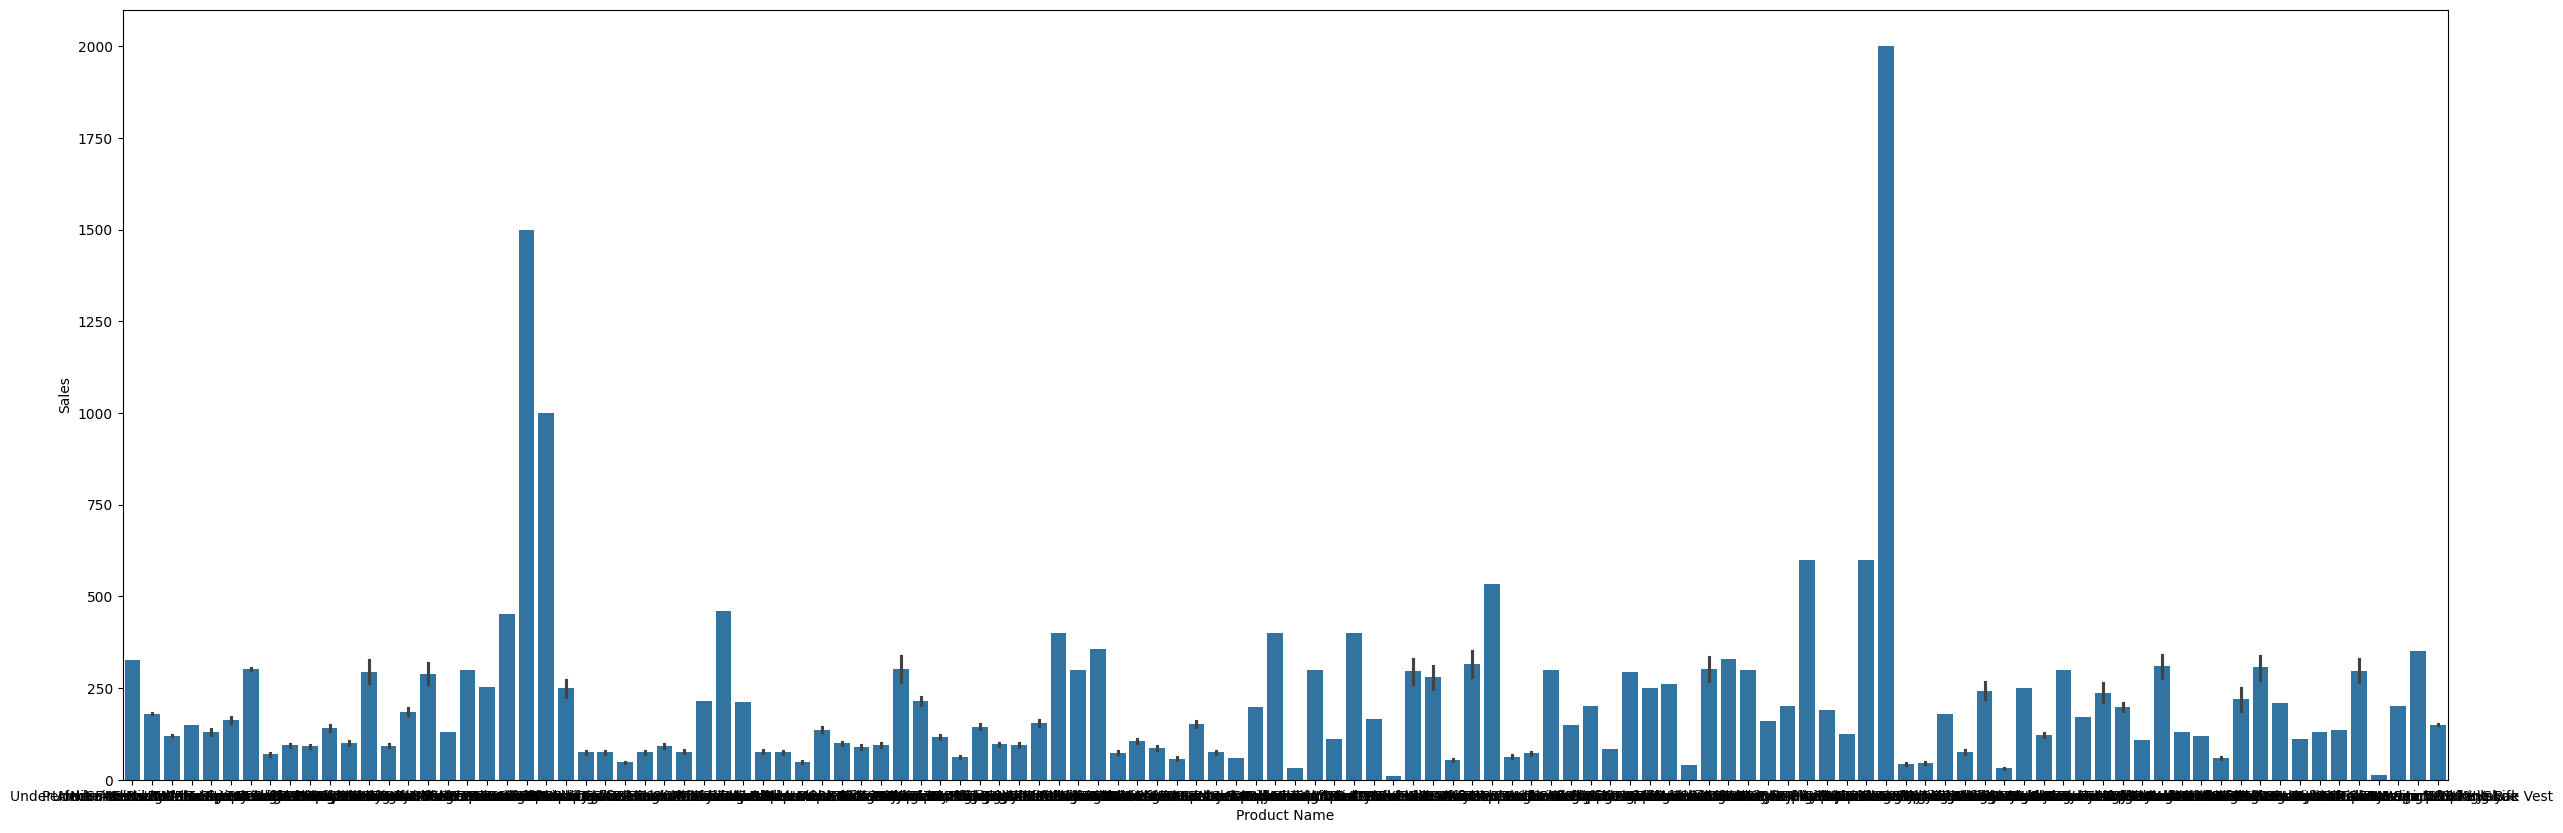

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Product Name', y='Sales', data=data)

In [ ]:
data['order_date']=pd.to_datetime(data['order_date'])
data.set_index('order_date',inplace=True)
data.sort_index(inplace=True)

In [ ]:
data_week = data.resample('W').mean(numeric_only=True) #resample data as weekly
#resample data as weekly
data_week.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order Customer Id,Order Id,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,order_year,order_month,order_day,order_hour
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,3.627168,3.215318,24.167514,174.726013,0.520231,31771.007225,29.784260,-84.012787,6022.919075,142.062139,...,0.123035,2.183526,194.670495,174.726013,24.167514,130.563558,2015.0,1.000000,2.567919,11.293353
2015-01-11,3.580396,3.104901,19.728151,179.912203,0.527085,35505.012898,29.604495,-84.680597,5962.443680,516.085125,...,0.112442,2.177988,199.656032,179.912203,19.728151,135.493873,2015.0,1.000000,8.016337,11.564058
2015-01-18,3.501656,2.817053,20.634098,177.198826,0.551325,39513.797185,29.482765,-86.319322,6008.024007,989.024834,...,0.119404,2.301325,197.076966,177.198826,20.634098,126.865276,2015.0,1.000000,14.916391,11.640728
2015-01-25,3.560996,3.043983,19.324772,180.276807,0.537759,37916.652282,30.571887,-86.415092,6588.004149,1474.404979,...,0.100498,2.266390,200.455025,180.276807,19.324772,131.904335,2015.0,1.000000,21.987552,11.986722
2015-02-01,3.492308,2.902024,22.613109,173.463241,0.557085,35370.175709,29.711780,-84.790188,6133.470445,1953.995142,...,0.129198,2.171660,193.150287,173.463241,22.613109,128.863266,2015.0,1.146559,24.476923,11.229960


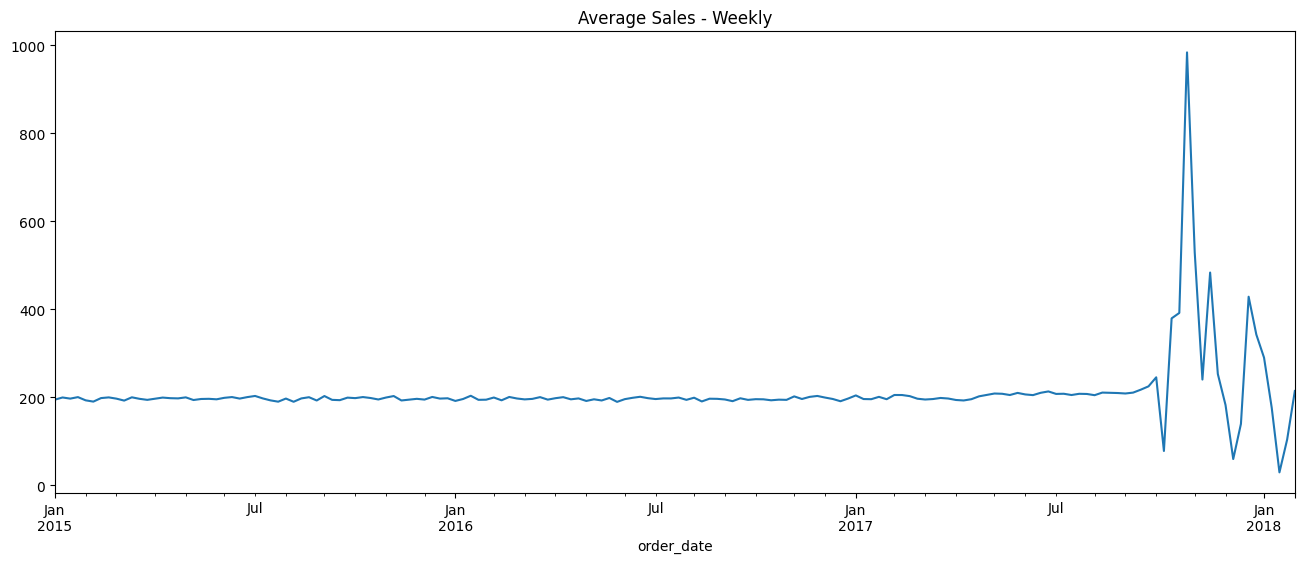

In [ ]:
plt.figure(figsize=(16,6))
data_week['Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
data_month = data.resample('MS').mean(numeric_only=True) # resampling as monthly

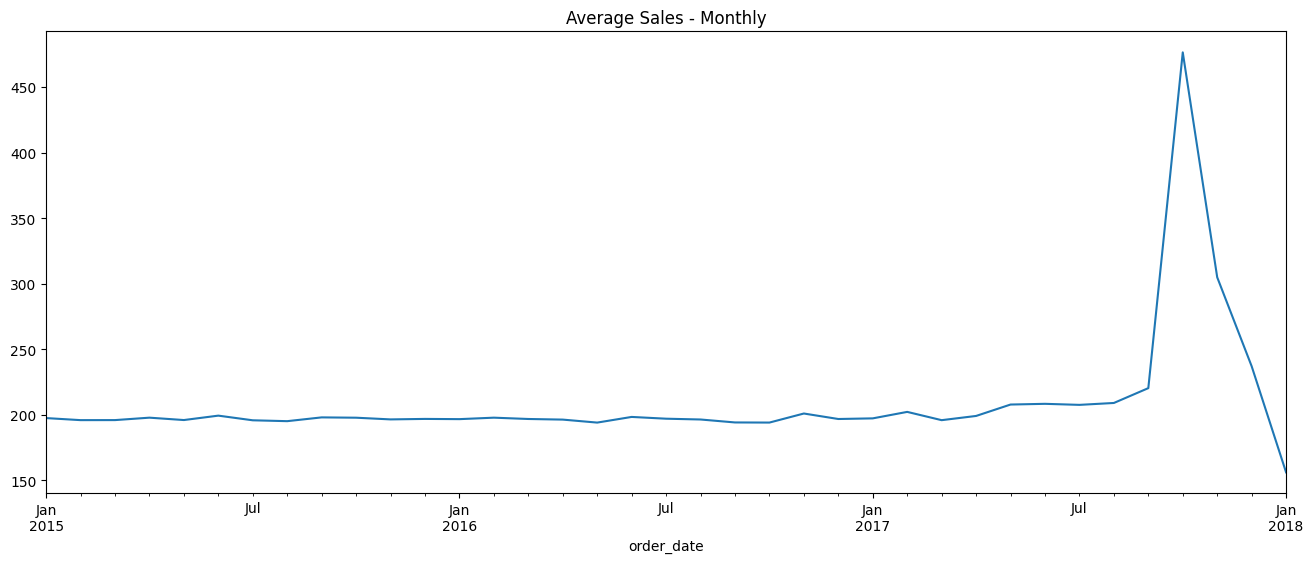

In [ ]:
plt.figure(figsize=(16,6))
data_month['Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X = data_week.drop(columns=["Sales"])  # Features
y = data_week["Sales"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (113, 21)
Test: (49, 21)


In [ ]:
train_data = data_week[:int(0.7*(len(data_week)))]
test_data = data_week[int(0.7*(len(data_week))):]

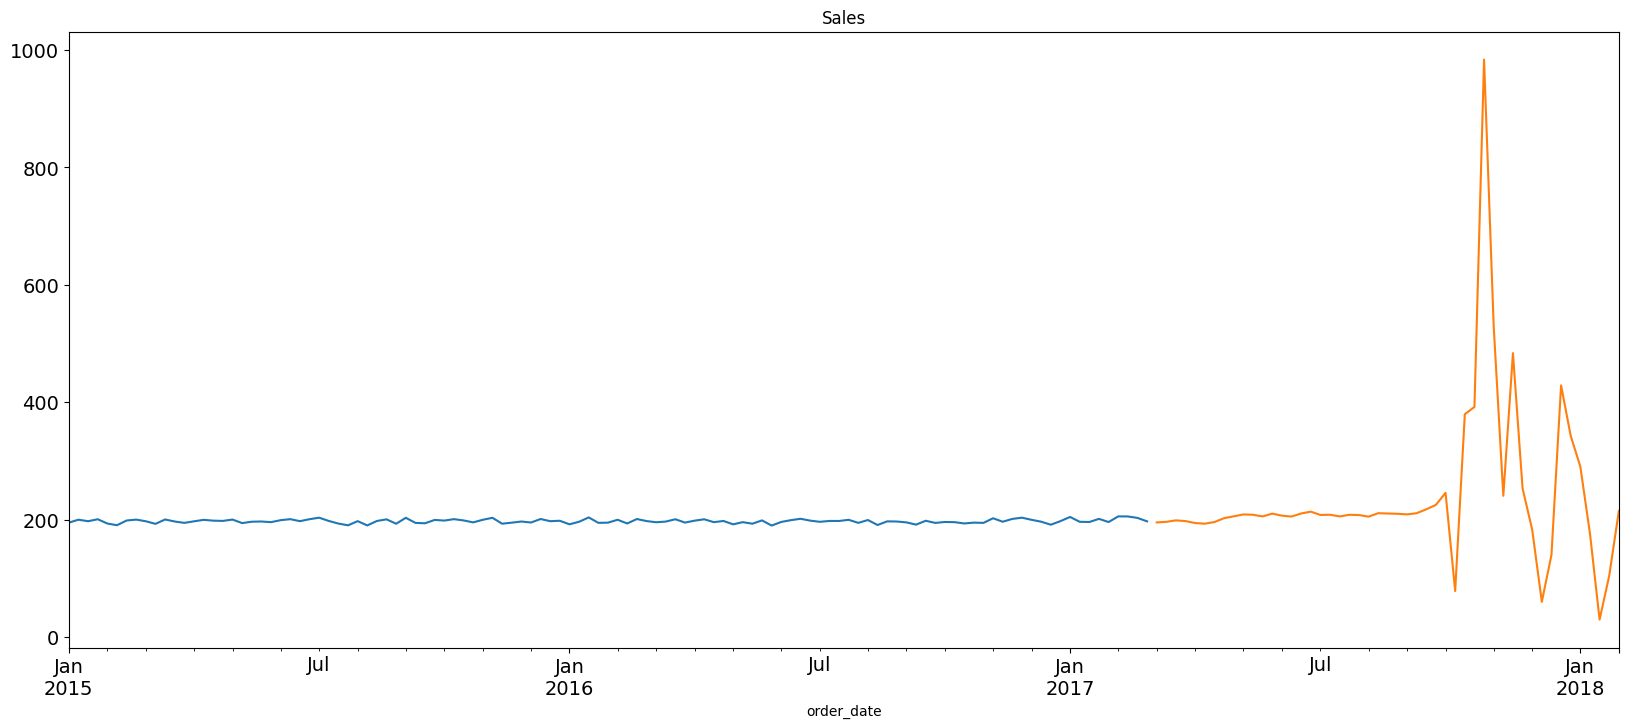

In [ ]:
train_data['Sales'].plot(figsize=(20,8), title= 'Sales', fontsize=14)
test_data['Sales'].plot(figsize=(20,8), title= 'Sales', fontsize=14)
plt.show()

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller_test(data_week['Sales'])

ADF Test Statistic : -2.2279463850437544
p-value : 0.19625930684996684
#Lags Used : 13
Number of Observations Used : 148
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
data_week['Sales First Difference'] = data_week['Sales'] - data_week['Sales'].shift(1)

In [ ]:
data_week['Sales'].shift(1)

order_date
2015-01-04           NaN
2015-01-11    194.670495
2015-01-18    199.656032
2015-01-25    197.076966
2015-02-01    200.455025
                 ...    
2018-01-07    342.484810
2018-01-14    290.136560
2018-01-21    176.041646
2018-01-28     29.502526
2018-02-04    104.076203
Freq: W-SUN, Name: Sales, Length: 162, dtype: float64

In [ ]:
df_week_diff = data_week['Sales'].diff().dropna() #creating difference values
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
train_data_diff

order_date
2015-01-11    4.985536
2015-01-18   -2.579066
2015-01-25    3.378059
2015-02-01   -7.304737
2015-02-08   -2.876419
                ...   
2017-01-29   -5.381336
2017-02-05    9.604077
2017-02-12   -0.084907
2017-02-19   -2.502598
2017-02-26   -5.893157
Freq: W-SUN, Name: Sales, Length: 112, dtype: float64

# Auto Arima

In [ ]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=250,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=670.522, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=644.354, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=628.709, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=625.521, Time=0.10 sec
 ARIMA(3

ARIMA(maxiter=250, order=(5, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

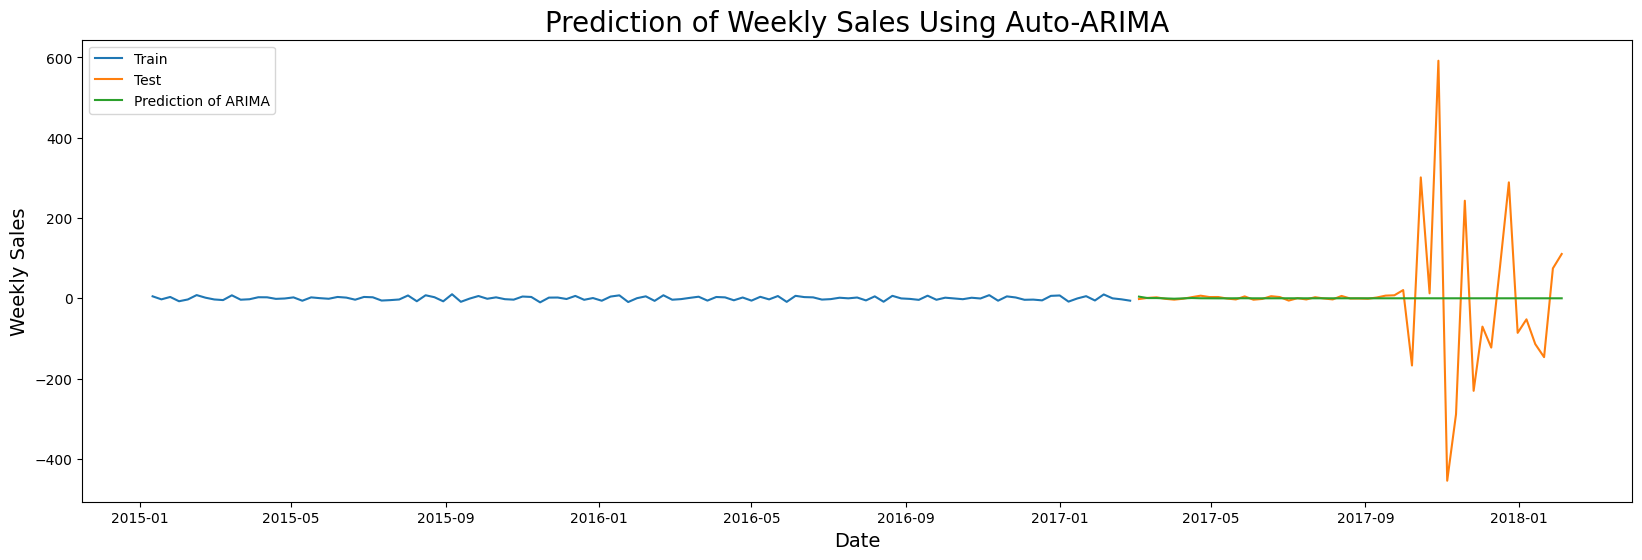

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_nn = np.sqrt(mean_squared_error(test_data_diff, y_pred))
r2_nn = r2_score(test_data_diff, y_pred)
print(f'Auto-Arima RMSE: {rmse_nn}, R2 Score: {r2_nn}')


Auto-Arima RMSE: 145.9847845532667, R2 Score: -2.2208059281991765e-05


In [ ]:
# Import the new ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Create the ARIMA model
model = ARIMA(data_week['Sales'], order=(5, 0, 0))

# Fit the model
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  162
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -915.273
Date:                Tue, 30 Apr 2024   AIC                           1844.547
Time:                        10:50:04   BIC                           1866.160
Sample:                    01-04-2015   HQIC                          1853.322
                         - 02-04-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        209.8522     28.031      7.487      0.000     154.913     264.791
ar.L1          0.4892      0.066      7.425      0.000       0.360       0.618
ar.L2          0.0253      0.067      0.377      0.706      -0.106       0.157
ar.L3         -0.0289      0.031     -0.929      0.353      -0.090       0.032
ar.L4         -0.0945      0.115     -0.822      0.411      -0.320       0.131
ar.L5          0.1290      0.051      2.550      0.011       0.030       0.228
sigma2      4719.9414    242.857     19.435      0.000    4243.950    5195.933
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             24729.92
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):             260.94   Skew:                             6.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='order_date'>

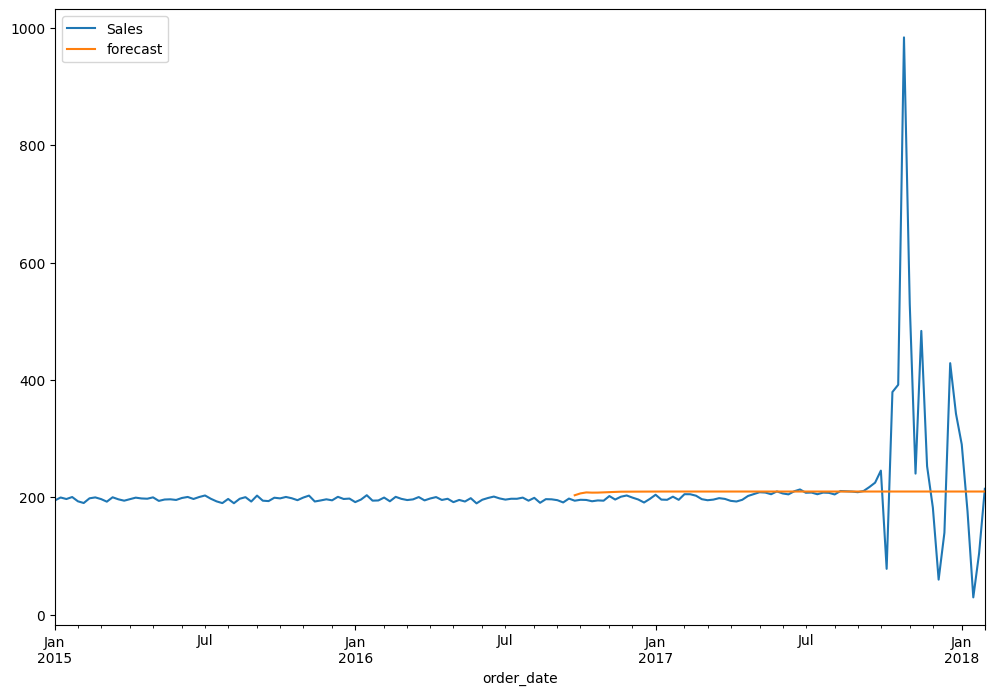

In [ ]:
data_week['forecast']=model_fit.predict(start=90,end=10233,dynamic=True)
data_week[['Sales','forecast']].plot(figsize=(12,8))

# Sarimax

In [ ]:
p, d, q = 5, 0, 0  # AR, I, MA orders
P, D, Q, s = 1, 1, 1, 12  # Seasonal orders

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_data_diff, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

In [ ]:
predictions = sarima_result.get_forecast(steps=len(test_data_diff))
pred_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data_diff, pred_mean))
print('RMSE:', rmse)
print('R^2 of sarima',r2_score(test_data_diff, pred_mean))


RMSE: 145.57669565300083
R^2 of sarima 0.0055609431110581475


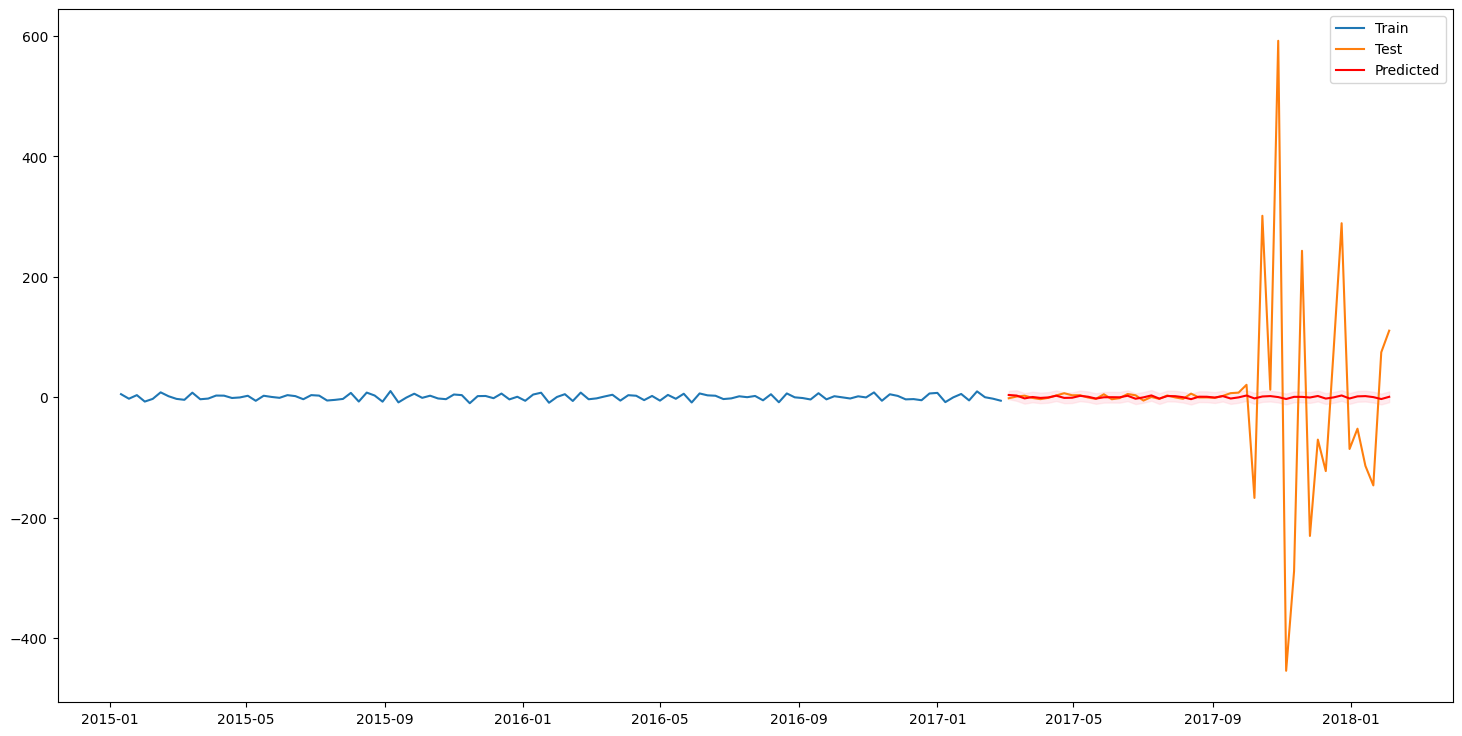

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(pred_mean, label='Predicted', color='r')
plt.fill_between(pred_mean.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# ExponentialSmoothing

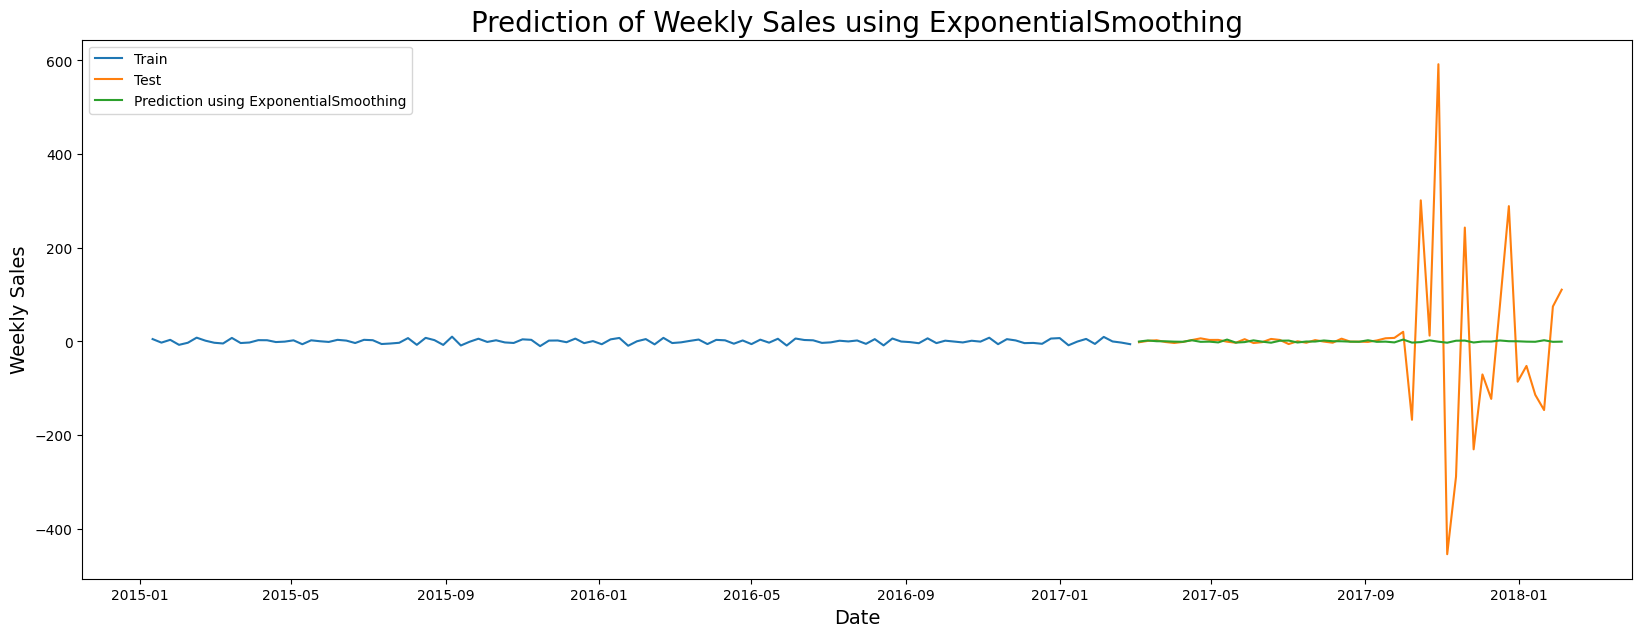

In [ ]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred1 = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,7))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred1, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_nn = np.sqrt(mean_squared_error(test_data_diff, y_pred1))
r2_nn = r2_score(test_data_diff, y_pred1)
print(f'Exponential Smoothing RMSE: {rmse_nn}, R2 Score: {r2_nn}')


Exponential Smoothing RMSE: 145.79431322803669, R2 Score: 0.002585615705855915


In [ ]:
train_data_diff

order_date
2015-01-11    4.985536
2015-01-18   -2.579066
2015-01-25    3.378059
2015-02-01   -7.304737
2015-02-08   -2.876419
                ...   
2017-01-29   -5.381336
2017-02-05    9.604077
2017-02-12   -0.084907
2017-02-19   -2.502598
2017-02-26   -5.893157
Freq: W-SUN, Name: Sales, Length: 112, dtype: float64

# LSTM

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


1/1 [==============================] - 0s 44ms/step - loss: 0.0032
Mean Squared Error on Test Set: 0.0032391129061579704
1/1 [==============================] - 1s 1s/step


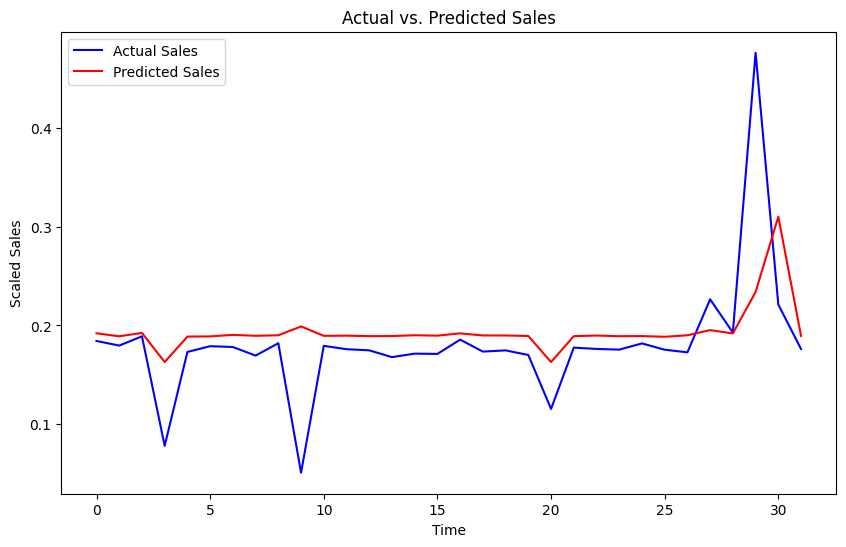

In [ ]:
sequence_length = 4

# Function to create sequences from the data
def create_sequences(df_week, sequence_length):
    X, y = [], []
    for i in range(len(df_week) - sequence_length):
        X.append(df_week[i:i + sequence_length])
        y.append(df_week[i + sequence_length])
    return np.array(X), np.array(y)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_week[['Sales']].values)

X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Set:", loss)
predicted_sales = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales', color='blue')
plt.plot(predicted_sales, label='Predicted Sales', color='red')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_nn = np.sqrt(mean_squared_error(y_test, predicted_sales))
r2_nn = r2_score(y_test, predicted_sales)

print(f'LSTM RMSE: {rmse_nn}, R2 Score: {r2_nn}')


LSTM RMSE: 0.056913206384759274, R2 Score: 0.16153915379539774


In [ ]:
predicted_sales_original_scale = scaler.inverse_transform(predicted_sales)

In [ ]:
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
rmse_lstm_original_scale = np.sqrt(mean_squared_error(y_test_original_scale, predicted_sales_original_scale))
print("LSTM RMSE (Original Scale):", rmse_lstm_original_scale)

LSTM RMSE (Original Scale): 54.2975081627463


In [ ]:
print('original r^2',r2_score(y_test_original_scale, predicted_sales_original_scale))

original r^2 0.16153914955423476


# Prophet

In [ ]:
!pip install statsmodels

In [ ]:
data_week.reset_index(inplace=True)

In [ ]:
data = data_week[['order_date','Sales']]
data.rename(columns = {'Sales':'y','order_date':'ds'},inplace = True)

<Axes: xlabel='ds'>

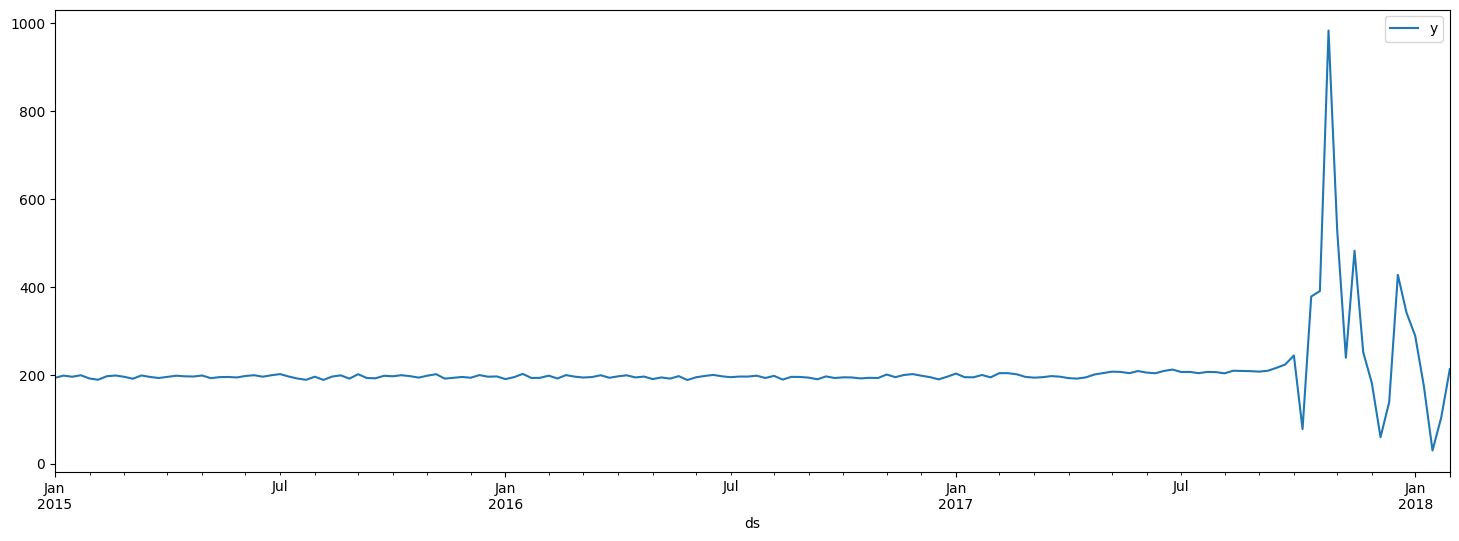

In [ ]:
data.plot(x='ds',y='y',figsize=(18,6))


In [ ]:
data_train =data[:int(0.9*(len(df_week_diff )))]
data_test = data[int(0.9*(len(df_week_diff ))):]

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(data_train)
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6q39vip/9howdopv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6q39vip/lxm9detp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87491', 'data', 'file=/tmp/tmph6q39vip/9howdopv.json', 'init=/tmp/tmph6q39vip/lxm9detp.json', 'output', 'file=/tmp/tmph6q39vip/prophet_modelpbktjya6/prophet_model-20240430110038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:00:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
169,2017-10-27,219.364783,214.743061,224.421195
170,2017-10-28,219.634561,214.802304,224.509009
171,2017-10-29,219.932491,215.059966,224.822346
172,2017-10-30,220.252393,215.326410,224.959113
173,2017-10-31,220.587883,215.678562,225.570778


In [ ]:
data_test.tail()

,ds,y
157,2018-01-07,290.136560
158,2018-01-14,176.041646
159,2018-01-21,29.502526
160,2018-01-28,104.076203
161,2018-02-04,214.510641


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
future_dates=m.make_future_dataframe(periods=365)

In [ ]:
prediction=m.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,197.077632,192.021785,202.248131,197.077632,197.077632,0.166048,0.166048,0.166048,0.166048,0.166048,0.166048,0.0,0.0,0.0,197.243680
1,2015-01-11,197.072213,192.782185,202.992543,197.072213,197.072213,0.864766,0.864766,0.864766,0.864766,0.864766,0.864766,0.0,0.0,0.0,197.936978
2,2015-01-18,197.066793,193.247545,202.901820,197.066793,197.066793,1.003471,1.003471,1.003471,1.003471,1.003471,1.003471,0.0,0.0,0.0,198.070264
3,2015-01-25,197.061373,192.979266,203.034511,197.061373,197.061373,0.525183,0.525183,0.525183,0.525183,0.525183,0.525183,0.0,0.0,0.0,197.586556
4,2015-02-01,197.055953,192.575354,201.797010,197.055953,197.055953,0.221469,0.221469,0.221469,0.221469,0.221469,0.221469,0.0,0.0,0.0,197.277423


In [ ]:
plot_plotly(m, prediction)

In [ ]:
# Visualize Each Components[Trends,yearly]
plot_components_plotly(m, prediction)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data_train' is your training data and 'forecast' is the forecast generated by Prophet

# Extracting actual values for the forecast period
actual_values = data_train['y']  # Assuming 'y' is the column name for the target variable in your training data

# Extracting predicted values from the forecast
predicted_values = forecast['yhat'][:-30]

# Calculate RMSE
rmse_prophet = np.sqrt(mean_squared_error(actual_values, predicted_values))
print("Prophet RMSE:", rmse_prophet)
print('r^2 Prophet',r2_score (actual_values, predicted_values))


Prophet RMSE: 3.845283094868409
r^2 Prophet 0.6875283470724234


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='600 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 1 forecasts with cutoffs between 2016-10-01 00:00:00 and 2016-10-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmph6q39vip/r2wap7_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6q39vip/nmr5s0g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86407', 'data', 'file=/tmp/tmph6q39vip/r2wap7_v.json', 'init=/tmp/tmph6q39vip/nmr5s0g0.json', 'output', 'file=/tmp/tmph6q39vip/prophet_model5wm3j7q8/prophet_model-20240430110155.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-02,197.608033,193.980293,201.130736,195.774283,2016-10-01
1,2016-10-09,197.674623,194.116659,201.333948,195.478377,2016-10-01
2,2016-10-16,197.550902,194.034143,201.080963,193.268039,2016-10-01
3,2016-10-23,198.011406,194.469700,201.535805,194.682486,2016-10-01
4,2016-10-30,198.518495,194.837765,202.009036,194.245516,2016-10-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,29 days,11.173823,3.342727,3.182952,0.016372,0.017099,0.016225,0.6
1,36 days,14.183491,3.766098,3.674362,0.018744,0.021229,0.018652,0.4
2,43 days,13.246157,3.639527,3.309093,0.016874,0.021229,0.016795,0.4
3,50 days,19.103167,4.370717,3.832780,0.019309,0.021229,0.019398,0.4
4,57 days,32.290613,5.682483,4.922205,0.024530,0.021998,0.024839,0.2


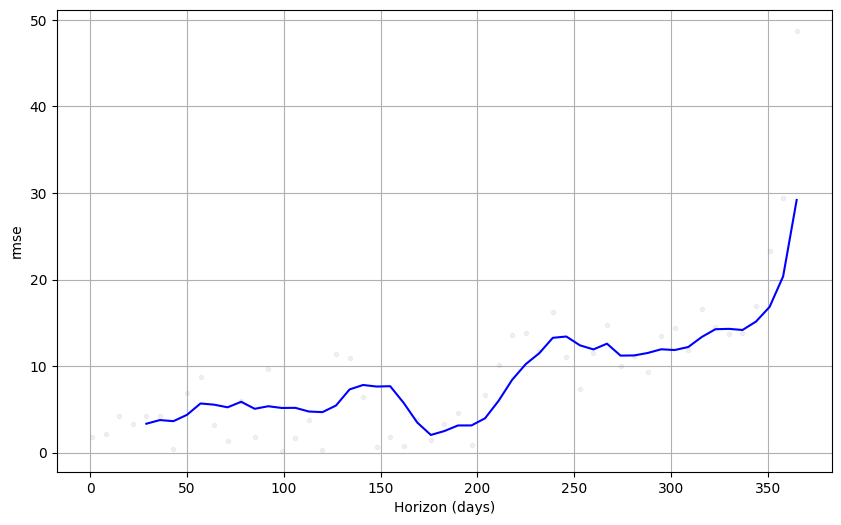

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
data.tail()

,ds,y
157,2018-01-07,290.136560
158,2018-01-14,176.041646
159,2018-01-21,29.502526
160,2018-01-28,104.076203
161,2018-02-04,214.510641


In [ ]:
import pickle
pickle_out=open('Model.pkl','wb')
pickle.dump(m,pickle_out)
pickle_out.close

<function BufferedWriter.close>